# Participant Selection for Python in Astronomy 2017

## TODO: Add part about the application form
## TODO: Do we want to include the output figures from the real selection, and if so, where?

This notebook documents the partipant selection procedure for Python in Astronomy 2017. 
For privacy reasons, this notebook uses data that has been completely randomized within categories, thus no candidate is individually identifiable (and names and other markers of identity have been removed completely).

For this reason, the results of this procedure do not exactly mirror the results of our participant selection: the candidates in our data set here are random combinations that follow the input distributions of our real data, and not actual people. But with over 285 applications for only 55 spots within Python in Astronomy, we felt it was important to be both transparent about and accountable for our selection procedure. This notebook is designed to give the reader an overview of the procedure from start to finish, and we have added our reasoning for certain choices where those were part of the selection. The notebook is also an example of what this kind of procedure can look like, and thus a kind of tutorial for other conference organizers.

Our procedures for admitting participants is constantly evolving as we tweak, make mistakes and learn from them. If you have any suggestions for future procedures (or more generally have thoughts about participant selection), we would love to hear from you either via an issue on this repository, or an e-mail to **[ADD E-MAIL ADDRESS]**.

## Pre-selection

Our participant selection proceeded in two parts. In the first part, we anonymized our applicant pool by replacing names and other identifying information with a unique identifier. The only candidates we rejected outright were either (1) duplicate entries and (2) candidates who had informed us that they would not be able to come. 

For the remainder of the pool, each member of the organizing committee was then asked to make a simple yes/no decision for a candidate based solely on their responses to the following two questions:
* _Can you tell us in 2-3 sentences why you would like to attend this workshop?_
* _Other possible contributions_

We ensured that each response was reviewed by at least three independent members of the committee, and reviewers could not see the answers that outer members had already given to further reduce bias.

This allowed us to remove candidates whose objectives for attending the workshop were very far removed from our actual objectives for the workshop. For example, a sizeable number of applicants stated that their goal at the workshop is to learn Python. Because the workshop website and description explicitly said that Python in Astronomy is *not* a Python tutorial, we excluded these candidates from the pool. Converting yes/no into numerical scores (1/0), we then accepted candidates whose average score across reviewers was at least 0.5. 

In the next step, we asked members of the committee to review both talk proposals and tutorial proposals in the same way. Because we had a much larger number of talks that all reviewers voted yes on than we had talk slots, we gave those entries a value of 1 and set the entry for the rest to 0 (these scores will be included in the selection procedure below).

Finally we pre-selected a number of candidates. These included the organizing committee, who need to be present at the meeting, and one candidate whom we had selected blindly based on their abstract for a longer (invited) talk. Finally, we gave each member of the committee to select a single person based on some specific expertise they would bring to the workshop; thus a total of 12 participants (6 organizers, 5 pre-selects, 1 speaker) where pre-selected. 

## Participant Selection

For the remaining 43 slots, we used `Entrofy` to optimize our participant set based on a set of well-defined criteria which the organizers discussed at length before performing the selection. It's worth noting here that this selection depended entirely on a discussion about the _goals_ of the workshop and was independent of the input data set. 

### Coding

While the questions on the application form collecting data for the second step of the application procedure were all multiple choice-type questions, some of them allowed specification via an "Other" category. Additionally, some categories had a very low response rate. Therefore we re-coded some responses either into a new category or by combining several categories into a new one that was more manageable. For example, we re-coded a response like `PhD Student` into our existing category `Graduate/Postgraduate student` and created a new `other` category for responses such as `Astroparticle Physics`, `science software`, `Solar System`. Finally, we also concatenated the responses in the "Geographical Location" question into 3 categories: `Western Europe`, `North America`, and `Other`.

### Imports

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import entrofy
import pandas as pd

## Data Loading

Pandas to the rescue!

In [63]:
data_ready = pd.read_csv("../data/pyastro17_randomized.csv", sep="\t", index_col="ID", )

Let's have a look at the data:

In [64]:
data_ready.head()

,current_position,education,gender,geography,open_source,preselect,previous_unconference,prog_bkg,race,reject,research_area,talks,tutorials
ID,,,,,,,,,,,,,
1.0,Graduate/Postgraduate student,No,Yes,Others,Yes,0.0,No,program Python a little (e.g. for coursework o...,No,0.0,non-astronomy,0.0,0.0
2.0,Graduate/Postgraduate student,No,No,North America,No,0.0,No,release Python code for others to use (e.g. fo...,Yes,0.0,main sequence & late type stars,0.0,0.0
3.0,Undergraduate/College student,No,No,Western Europe,No,0.0,Yes,program Python heavily (e.g. regularly for my ...,No,0.0,galaxies and galaxy clusters,0.0,0.0
4.0,Graduate/Postgraduate student,No,No,Western Europe,No,0.0,Yes,program Python a little (e.g. for coursework o...,Yes,0.0,exoplanets and planet formation,0.0,0.0
5.0,Postdoc,No,NaN,Others,No,0.0,Yes,program Python a little (e.g. for coursework o...,Yes,0.0,other,0.0,0.0


The software does better when the entries are all strings, so let's convert our table so that all columns contain string values:

In [65]:
data_ready["preselect"] = data_ready["preselect"].astype("str")
data_ready["previous_unconference"] = data_ready["previous_unconference"].astype("str")
data_ready["reject"] = data_ready["reject"].astype("str")
data_ready["talks"] = data_ready["talks"].astype("str")
data_ready["tutorials"] = data_ready["tutorials"].astype("str")


The columns encode the following information:
* `ID`: a numerical ID corresponding to a candidate (in the original data set, this was matched to names and e-mail addresses via a separate table
* `current_position`: Responses to the question about the candidates current (non-)academic position
* `education`: Responses to the question _"Have you previously been involved in Python-based educational/teaching activities?"_
* `gender`: Responses to the question _"In terms of gender identity, do you self-identify as an underrepresented minority in astronomy/astrophysics? "_
* `geography`: Responses to the question _"Geographic Area"_
* `open_source`: Responses to the question _"Have you previously developed or contributed to open-source packages?"_
* `preselect`: pre-selected candidates (see section above for details)
* `previous_unconference`: responses to the question _"Have you attended an unconference before?"_
* `prog_bkg`: Responses to the question _"How would you describe your Python programming background?"_
* `race`: Responses to the question _"In terms of racial or ethnic identity, do you self-identify as an underrepresented minority in astronomy/astrophysics?_
* `reject`: Rejected candidates (because of duplicate entries into the data table or withdrawals)
* `research_area`: Responses to the question _"Research Area"_
* `talks`: Accumulated committee decisions (1=yes, 0=no) for proposed talks
* `tutorials`: Accumulated committee decisions (1=yes, 0=no) for proposed tutorials

### Get pre-select and reject IDs

First, we  will take out the `preselect` and `reject` columns out, since they are not used in entrofy as categories, but rather to pre-select and reject participants. Actually let's just do the rejection at this point:

In [66]:
reject = data_ready["reject"]
reject_idx = reject[reject == 1.0].index
preselect = data_ready["preselect"]
preselect_idx = preselect[preselect == 1.0].index

# this drops all columns with the rejected indices:
data_ready.drop(reject_idx, inplace=True)

Now we can remove the `preselect` and `reject` columns:

In [67]:
data_ready.drop("reject", axis=1, inplace=True)
data_ready.drop("preselect", axis=1, inplace=True)

## Setting Up Entrofy

Okay, now we're ready to set up entrofy for selection. This will invovle tots and lots of dictionaries! 

In [68]:
data_ready.columns

Index(['current_position', 'education', 'gender', 'geography', 'open_source',
       'previous_unconference', 'prog_bkg', 'race', 'research_area', 'talks',
       'tutorials'],
      dtype='object')

There are two important decisions to make for each category (=column): (1) set its weight and (2) set the relative target fractions for each possible answer within a category.

The weight essentially sets the relative importance of the questions we asked compared to each other. The target fractions decide for each category what fraction of participants should ideally have that characteristic. One example would be a split of, say 0.4 for participants with previous unconference experience, and 0.6 for participants without. 

**Note**: Setting target fractions is the single most important part of the selection procedure. It is here that a discussion about the goals of the workshop is of crucial importance, because those goals will necessarily inform the target fractions to be set.

In our case, we set all weights to 1, giving equal weight to all categories:

In [69]:
weights = dict([(c, 1.0) for c in data_ready.columns])

`entrofy` works with a class called `Mappers`. These mappers essentially map target fractions to possible values within categories and contain a lot of information about how the code mades choices. Because all of our columns are categorical variables (with discrete, unordered responses), we can use the `CategoricalMapper` class to construct mappers for all columns:


In [70]:
datatypes = dict([(c, "categorical") for c in data_ready.columns])

In [71]:
datatypes

{'current_position': 'categorical',
 'education': 'categorical',
 'gender': 'categorical',
 'geography': 'categorical',
 'open_source': 'categorical',
 'previous_unconference': 'categorical',
 'prog_bkg': 'categorical',
 'race': 'categorical',
 'research_area': 'categorical',
 'talks': 'categorical',
 'tutorials': 'categorical'}

In [72]:
mappers = entrofy.core.construct_mappers(data_ready, weights, datatypes=datatypes)

This constructs a dictionary of `CategoricalMapper` objects:

In [73]:
mappers

{'current_position': <entrofy.mappers.ObjectMapper at 0x10dbe41d0>,
 'education': <entrofy.mappers.ObjectMapper at 0x112815b00>,
 'gender': <entrofy.mappers.ObjectMapper at 0x10dbe4278>,
 'geography': <entrofy.mappers.ObjectMapper at 0x115321cc0>,
 'open_source': <entrofy.mappers.ObjectMapper at 0x112725860>,
 'previous_unconference': <entrofy.mappers.ObjectMapper at 0x11273e780>,
 'prog_bkg': <entrofy.mappers.ObjectMapper at 0x10d65ae80>,
 'race': <entrofy.mappers.ObjectMapper at 0x115321390>,
 'research_area': <entrofy.mappers.ObjectMapper at 0x10d65af98>,
 'talks': <entrofy.mappers.ObjectMapper at 0x112815ac8>,
 'tutorials': <entrofy.mappers.ObjectMapper at 0x11273e7b8>}

`entrofy` has some plotting capabilities. in particular, it has the ability to make a corner plot to display the relative distributions in the input data set, as well as correlations between different input categories. 

**Note**: We will plot our data here as an example, but it is generally inadvisable to do this *before* having decided on target fractions, because the targets should be a function of the *goals* of the workshop, rather than the input data set.

/Users/danielahuppenkothen/work/repositories/entrofy/entrofy/plotting.py:687: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  axes[i,j].set_axis_bgcolor('white')


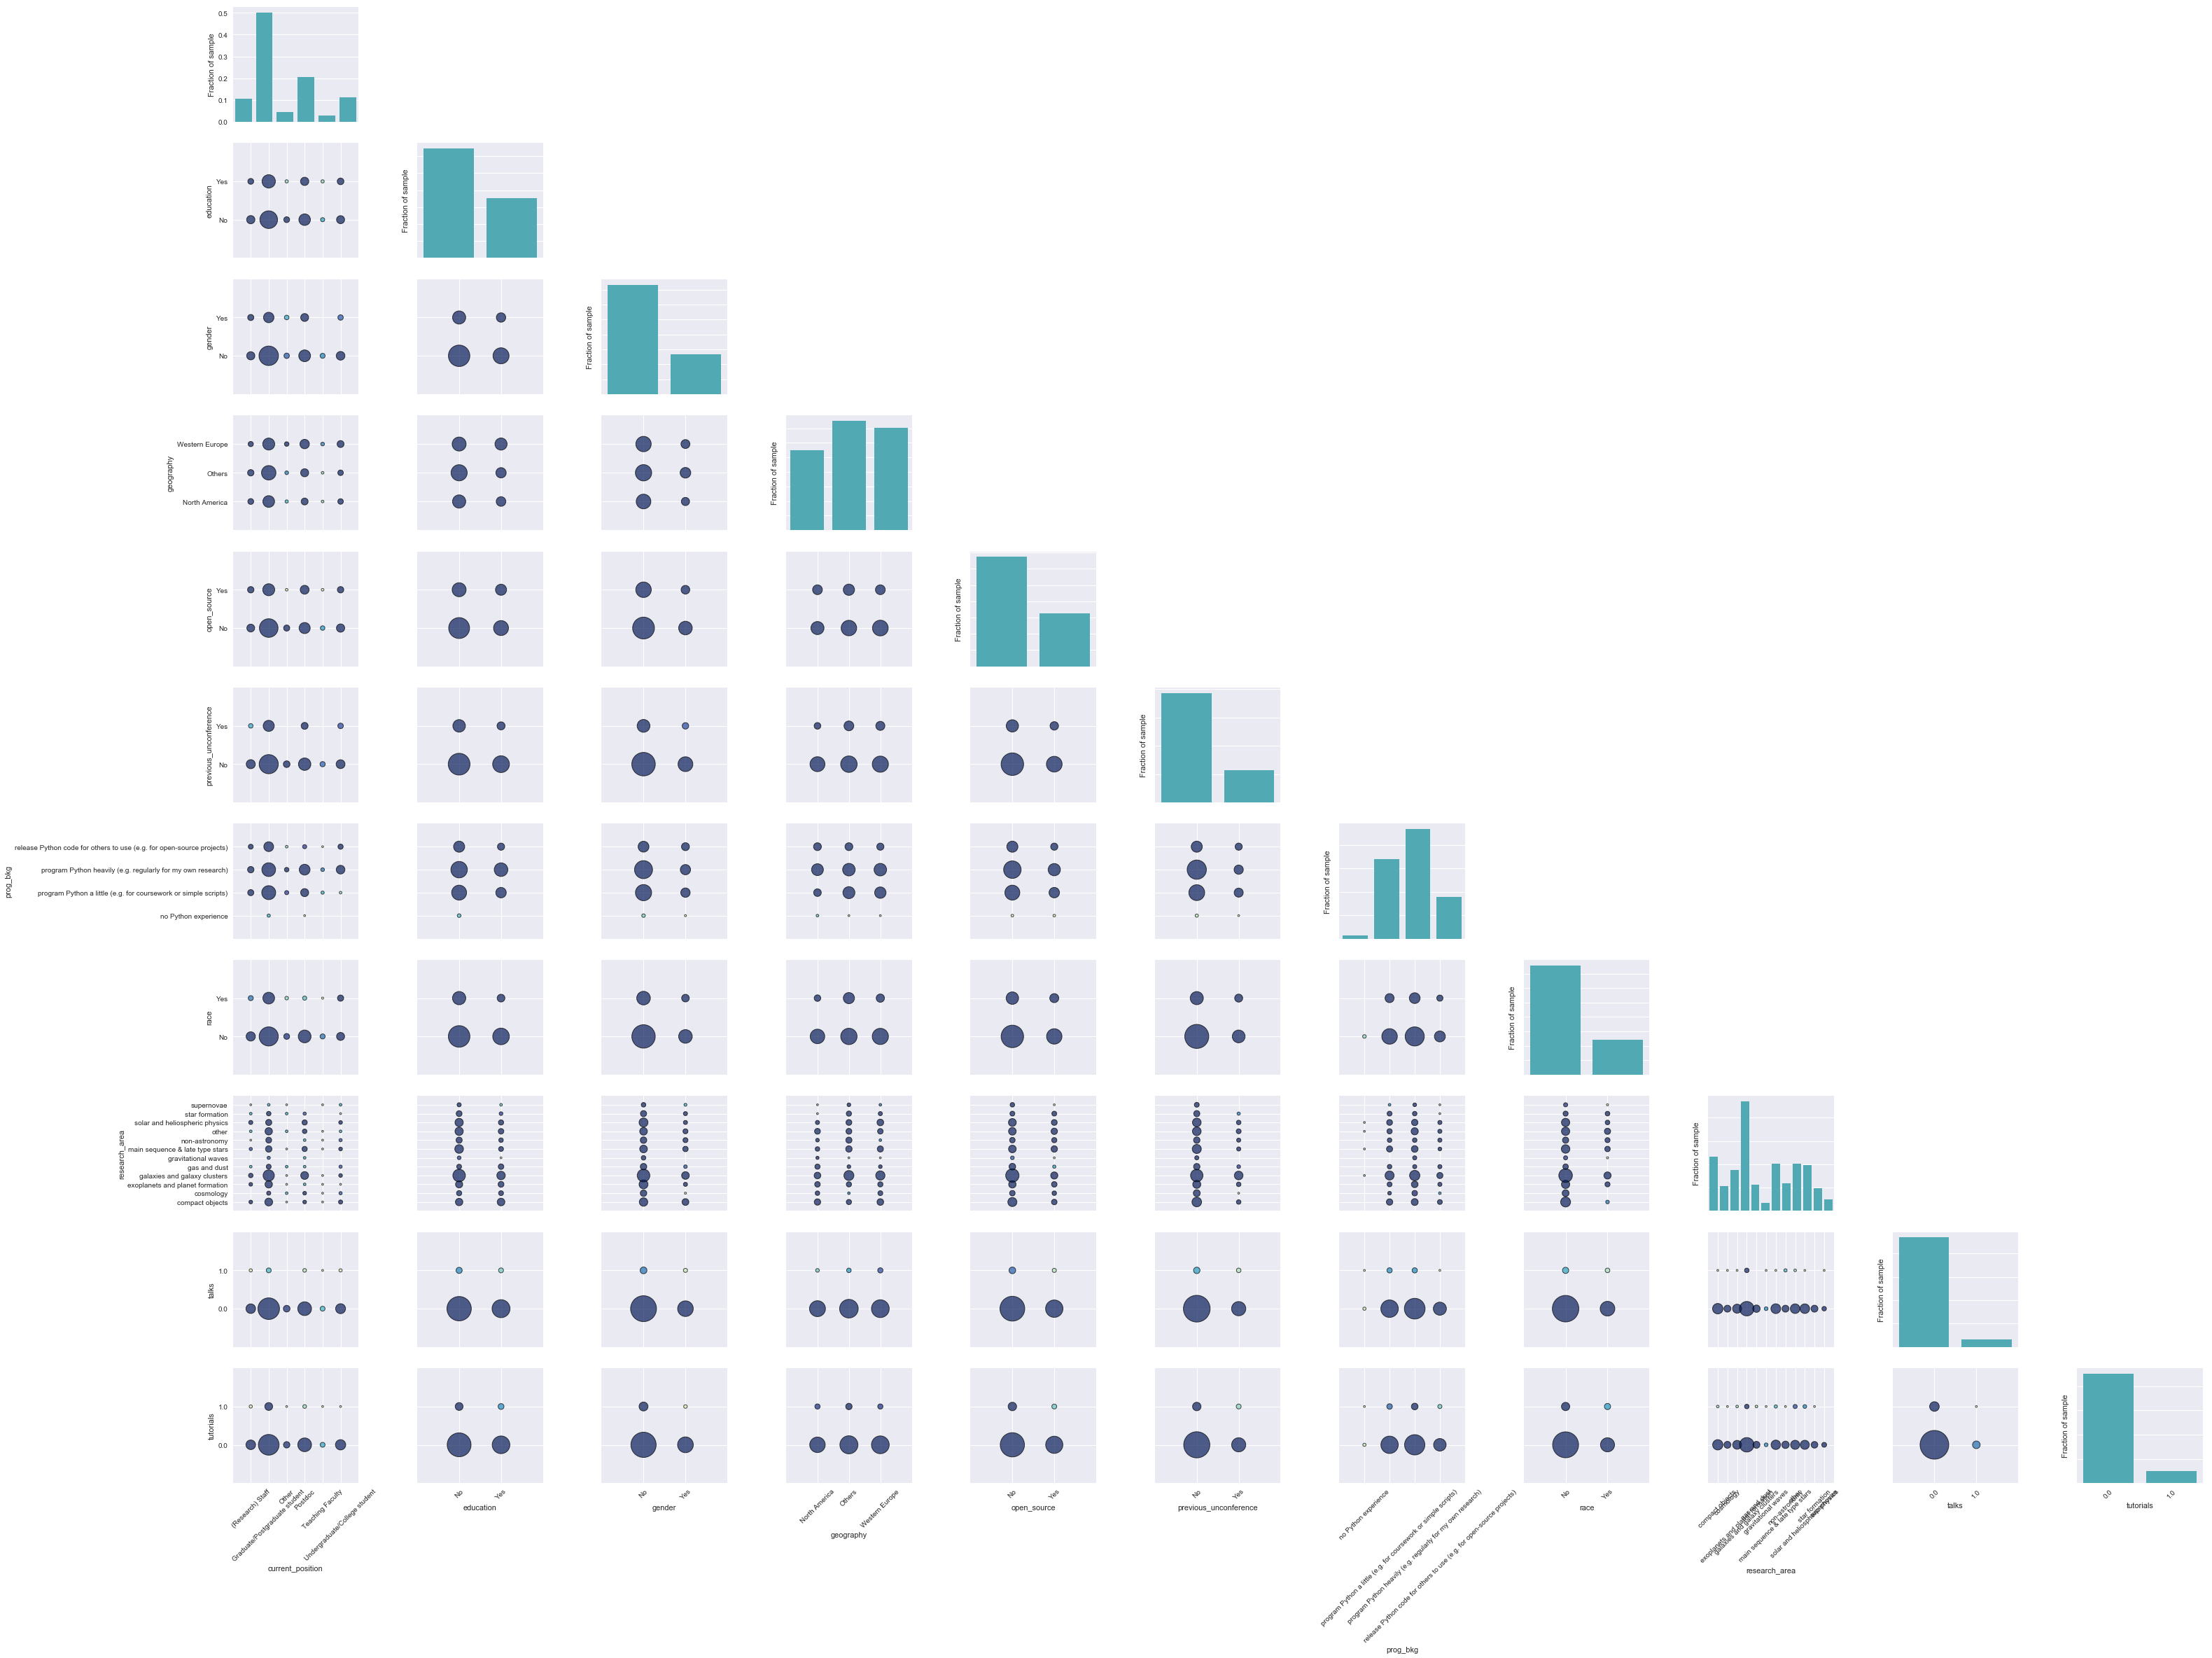

In [74]:
fig, axes = entrofy.plotting.plot_triangle(data_ready, weights, mappers=mappers)

### Targets

Now we can define some targets. Each category (e.g. "talks") has a discrete, finite number of possible outcomes (e.g. "yes" and "no"). The targets define the fraction of participants in the final output set who share the same value (e.g. 30% of participants should be in "yes"). 
The target fractions must sum up to be smaller or equal to 1.0 for each category. If the target fractions sum to a value smaller than one, the algorithm will try to fill up categories to *at least* the given fractions, and will ignore that category for the rest of the optimization procedure. The resulting mix of participants in the final set for this category will thus be a combination of the input fractions and the distribution in the input sample, conditioned on the constraints set by the remaining categories.

Below, we will go through each category one by one and lay out our reasoning for the categories chosen. The justification for our choices is an abbreviated version of a longer discussion the organizing committee had before starting the selection procedure. We should note at this point that there is no "correct" way to choose target fractions; the target fractions must necessarily always be a function of the objectives and goals of the workshop, as defined by the organizers, and may also depend on how the organizers see the role of the workshop in the larger community.

Broadly, the goals we defined for Python in Astronomy 2017 as they pertain to participant selection are the following:
* Provide a venue for established open-source projects in astronomy to exchange ideas, knowledge and collaborate
* Invite new researchers into the open-source community and foster long-term engagement
* Teach each other about new tools and best practices in open-source development
* Have participants act as ambassadors who will spread new knowledge into existing communities
* Increase the participation of underrepresented minorities in open-source activities

#### Current Position

For `current_position`, our aim was to find a mix between young researchers engaged in open-source activities or interested in OSS, and more senior developers and project managers. Traditionally, engagement is highest among graduate students and postdocs, but also among research staff (particularly a strong engagement of STScI in astropy). These three groups account for the large majority of accepted participants. We also aimed to accept teaching faculty, who are likely to act as multipliers for new tools and practices within their groups and communities. Finally, we felt that a small number of undergraduate students could benefit from attendance at the meeting, and we included a category "other" for those participants who don't fit into standard academic categories.

In [75]:
data_ready["current_position"].unique()

array(['Graduate/Postgraduate student', 'Undergraduate/College student',
       'Postdoc', '(Research) Staff', 'Teaching Faculty', 'Other'], dtype=object)

In [76]:
cp_targets = {'(Research) Staff': 0.18,
              'Graduate/Postgraduate student': 0.25,
              'Other': 0.10,
              'Postdoc': 0.25,
              'Teaching Faculty': 0.17,
              'Undergraduate/College student': 0.05}

In [77]:
mappers["current_position"].targets = cp_targets

It has also been suggested to weigh this category not as highly:

In [78]:
weights["current_position"] = 0.7

#### Research Area

Next category: `research_area`. Here, out goal was to have no input category larger than 30%, so that it would not dominate the meeting

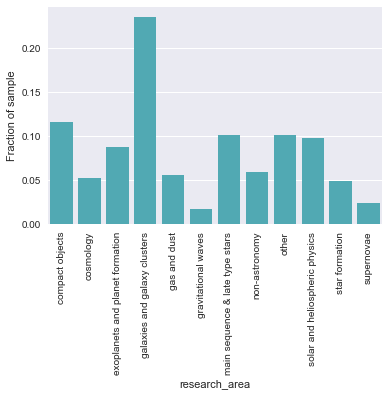

In [79]:
fig, ax = plt.subplots(1, 1)
entrofy.plotting.plot_distribution(data_ready, "research_area", ax=ax)
xticks = ax.xaxis.get_ticklabels()
ax.xaxis.set_ticklabels(xticks, rotation=90);

I'm going to set the targets evenly to 6%. This ensures that every subject will have at least 6% representation (3 people); the rest can be randomly selected. 

In [80]:
ra_targets = dict([(k, 0.06) for k in data_ready["research_area"].unique()])

In [81]:
ra_targets

{'compact objects': 0.06,
 'cosmology': 0.06,
 'exoplanets and planet formation': 0.06,
 'galaxies and galaxy clusters': 0.06,
 'gas and dust': 0.06,
 'gravitational waves': 0.06,
 'main sequence & late type stars': 0.06,
 'non-astronomy': 0.06,
 'other': 0.06,
 'solar and heliospheric physics': 0.06,
 'star formation': 0.06,
 'supernovae': 0.06}

In [82]:
mappers["research_area"].targets = ra_targets

#### Talks

Next category is talks. This is difficult, because we want exactly 13 talks, but we don't want this category to be a *negative* when it comes to the rest of the selection. 

So we're going to set the fraction of talks to $0.25$, and the fraction of "no talks" also to $0.25$. This should work in such a way that the rest of the people are randomly selected.

In [83]:
mappers["talks"].targets["0.0"] = 0.24
mappers["talks"].targets["1.0"] = 0.24

In [84]:
mappers['talks']

#### Tutorials

We do the same for the tutorials. We have 3 tutorial slots.

In [108]:
mappers["tutorials"].targets["0.0"] = 0.0
mappers["tutorials"].targets["1.0"] = 0.06

#### Python Experience

For Python experience, we actually want to exclude all those that have no python experience at all, since the workshop is explicitly not designed for newcomers to learn Python. For the rest, we've determined a split during our meeting in such a way that we achieve high diversity across skill levels.

In [109]:
mappers["prog_bkg"].targets['no Python experience'] = 0.0
mappers["prog_bkg"].targets['program Python a little (e.g. for coursework or simple scripts)'] = 0.33
mappers["prog_bkg"].targets['program Python heavily (e.g. regularly for my own research)'] = 0.34
mappers["prog_bkg"].targets['release Python code for others to use (e.g. for open-source projects)'] = 0.33

In [110]:
mappers["prog_bkg"].targets

{'no Python experience': 0.0,
 'program Python a little (e.g. for coursework or simple scripts)': 0.33,
 'program Python heavily (e.g. regularly for my own research)': 0.34,
 'release Python code for others to use (e.g. for open-source projects)': 0.33}

#### Previous Open Source Contributions

Based on out goals of wanting to foster existing open-source efforts, but also encourage newcomers to participate, we determined a split that admits just slightly more participants with previous experience than without. This is in part designed to avoid experienced developers becoming overwhelmed at the meeting with requests for advice, such that they have a chance to follow their own agenda part of the time.

In [111]:
mappers["open_source"].targets["Yes"] = 0.6
mappers["open_source"].targets["No"] = 0.4

In [112]:
mappers["open_source"].targets

{'No': 0.4, 'Yes': 0.6}

#### Previous Experience in Python-based Education

An important component of PyAstro is education: how do we educate the community about existing efforts? How do we improve documentation? How do we teach Python and git to our students (or supervisors)? 

In recognition of this, we aim to have a sizeable number of participants with previous experience in educational efforts, but we chose to accept *at least* that many participants, rather than penalizing the presence of a larger number of participants with educational experience.


In [113]:
mappers["education"].targets["Yes"] = 0.3
mappers["education"].targets["No"] = 0.4

In [114]:
mappers["education"].targets

{'No': 0.4, 'Yes': 0.3}

#### Previous Unconference Attendance

The argumentation for this category closely follows that for the category regarding open-source development. Because of PyAstro's format as an unconference, having a number of participants with previous experience is crucial for success, since they are likely to lead break-outs, sprints and hacks. On the other hand, engaging newcomers brings new ideas and experiences, and might encourage them to participate more often in similar events in the future, thus we choose to accept nearly half of participants in the latter category.

In [115]:
mappers["previous_unconference"].targets["Yes"] = 0.4
mappers["previous_unconference"].targets["No"] = 0.3

In [116]:
mappers["previous_unconference"].targets

{'No': 0.3, 'Yes': 0.4}

#### Geographic Area

Currently, the majority of Python software efforts occur in North America and Western Europe. 
On the other hand, PyAstro presents a unique opportunity to invite previously disconnected communities in other countries to existing efforts, learn about their experiences and foster long-term engagement beyond the Western world. Thus, we aim to admit a third of participants from countries that are traditionally underrepresented at astronomy conferences.

In [117]:
mappers["geography"].targets

{'North America': 0.3333333333333333,
 'Others': 0.3333333333333333,
 'Western Europe': 0.3333333333333333}

#### Gender Identity

Any social engineering involving gender and ethnicity or race is necessarily subject to scrutiny. 
Our choices here reflect our beliefs about what we would like PyAstro to be, and what we would like it to be within the larger context of the astronomy community:

* We recognize that underrepresented minorities are particularly underrepresented in the more technical areas within astronomy, including software development
* We also recognize studies that show that diverse groups outperform groups lacking diversity among several axes
* Representation is important: we believe that minority participants might feel more comfortable participating if they do not feel singled out based on their race or gender.

Python in Astronomy represents an albeit small opportunity for us to actively encourage the inclusion of minorities and their software efforts, and thus we feel justified to socially engineer our targets beyond what we would expect from the input data set based on the past two workshops. 

We should note, however, that the targets for race had be adjusted post-hoc when it became clear that their representation in the input data set was too small for the algorithm to find a valid solution. Solving this problem likely requires more targeted advertising among the relevant communities in future iterations of the workshop. 


In [118]:
mappers["gender"].targets = {"Yes": 0.5, "No":0.5}

#### Ethnicity/Race


In [119]:
mappers["race"].targets = {"Yes": 0.4, "No": 0.6}

In [120]:
mappers["race"].targets

{'No': 0.6, 'Yes': 0.4}

### Running Entrofy

We are now almost ready to run the code. 

Because some categories have the same responses (e.g. "Yes" and "No"), we need to add prefixes to the mappers so that answers that appear in multiple columns get attributed correctly:

In [121]:
for key in mappers.keys():
    mappers[key].prefix = key + "_"


In [122]:
mappers

{'current_position': <entrofy.mappers.ObjectMapper at 0x10dbe41d0>,
 'education': <entrofy.mappers.ObjectMapper at 0x112815b00>,
 'gender': <entrofy.mappers.ObjectMapper at 0x10dbe4278>,
 'geography': <entrofy.mappers.ObjectMapper at 0x115321cc0>,
 'open_source': <entrofy.mappers.ObjectMapper at 0x112725860>,
 'previous_unconference': <entrofy.mappers.ObjectMapper at 0x11273e780>,
 'prog_bkg': <entrofy.mappers.ObjectMapper at 0x10d65ae80>,
 'race': <entrofy.mappers.ObjectMapper at 0x115321390>,
 'research_area': <entrofy.mappers.ObjectMapper at 0x10d65af98>,
 'talks': <entrofy.mappers.ObjectMapper at 0x112815ac8>,
 'tutorials': <entrofy.mappers.ObjectMapper at 0x11273e7b8>}

Now we're actually ready to run entrofy. We will select for 55 participants, using the pre-selected candidates as a starting point for the optimization. They are included in the procedure so that their attributes will explicitly count towards the total fractions in each category. 

In [142]:
idx, max_score = entrofy.core.entrofy(data_ready, 55, 
                                      pre_selects=preselect_idx,
                                      mappers=mappers,
                                      weights=weights, seed=20)

In [143]:
idx

Float64Index([ 16.0,  18.0,  21.0,  25.0,  29.0,  30.0,  40.0,  41.0,  47.0,
               50.0,  51.0,  54.0,  57.0,  58.0,  66.0,  67.0,  76.0,  77.0,
               84.0,  87.0,  95.0,  96.0,  97.0, 100.0, 102.0, 113.0, 122.0,
              131.0, 133.0, 134.0, 140.0, 144.0, 147.0, 150.0, 154.0, 157.0,
              158.0, 170.0, 172.0, 174.0, 177.0, 178.0, 179.0, 183.0, 185.0,
              193.0, 196.0, 210.0, 223.0, 234.0, 241.0, 242.0, 252.0, 268.0,
              281.0],
             dtype='float64', name='ID')

In [144]:
max_score

113.61186574682623

Let's make a data set with just the output set:

In [145]:
df_out = data_ready.loc[idx]

Here are the distributions of the output set:

/Users/danielahuppenkothen/work/repositories/entrofy/entrofy/plotting.py:687: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  axes[i,j].set_axis_bgcolor('white')


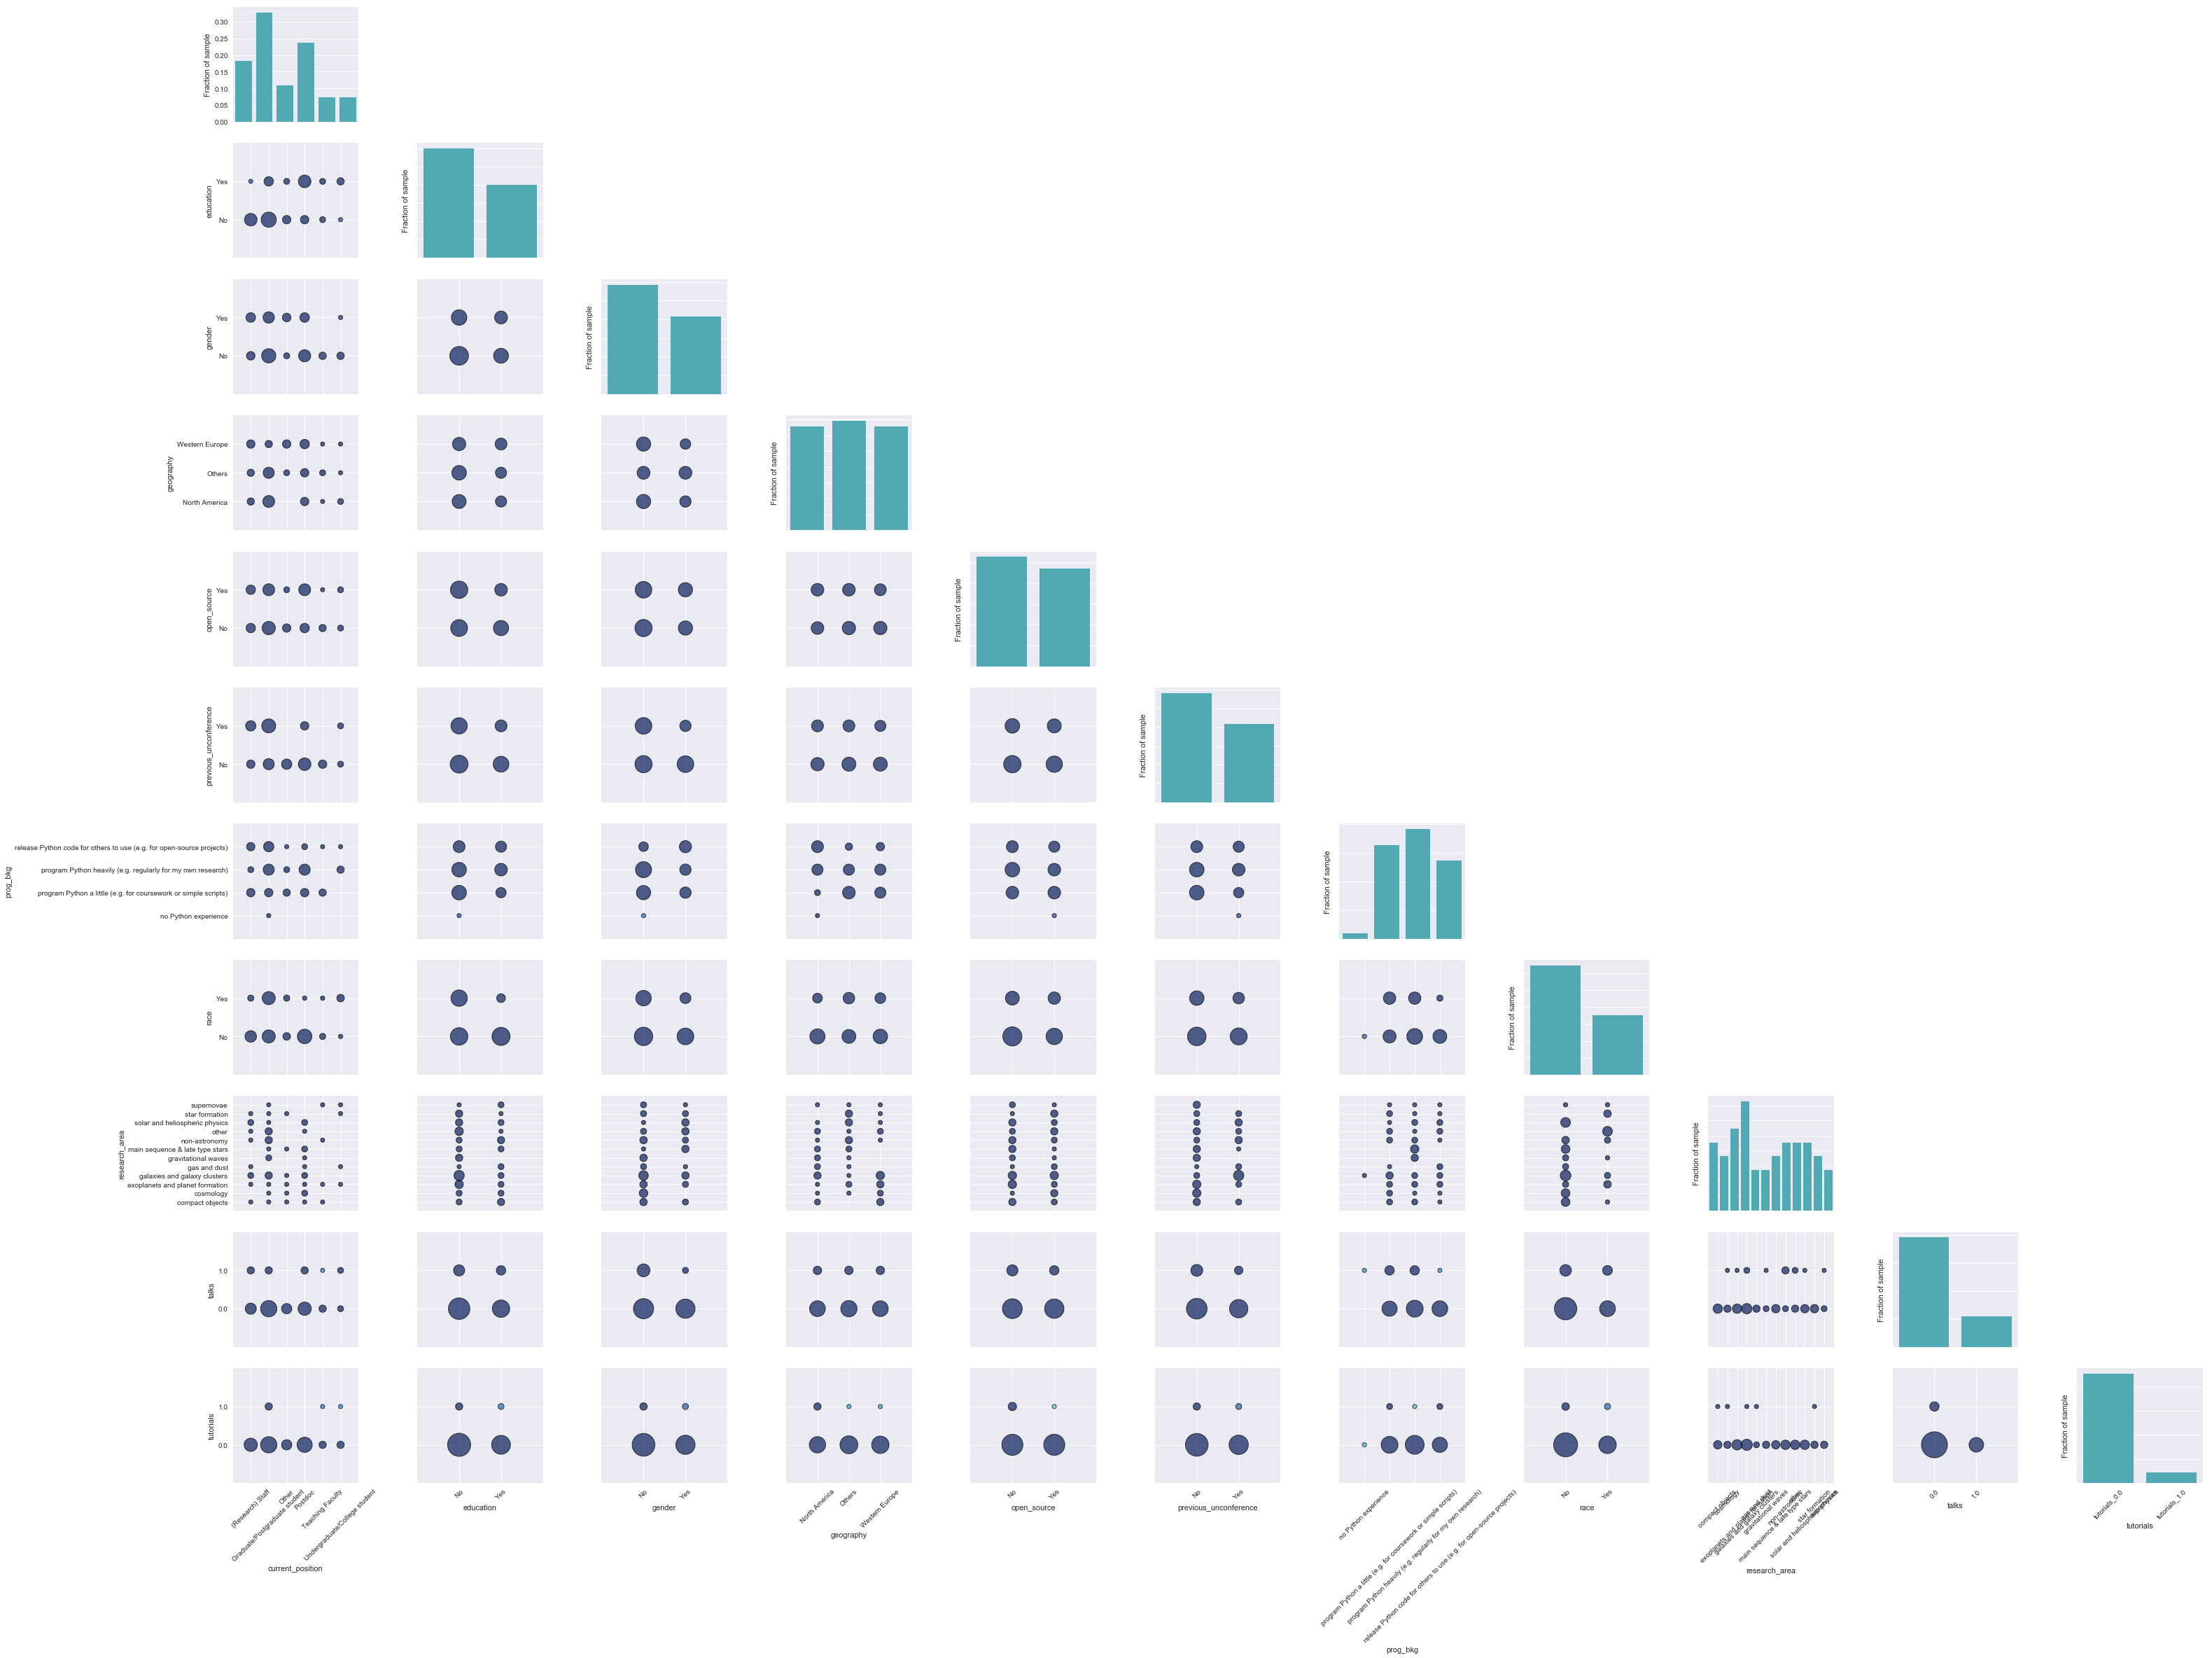

In [146]:
fig, ax  = entrofy.plotting.plot_triangle(df_out, weights,
                                          mappers=mappers,
                                          cat_type="violin")

We can also visualize the results as bar plots for each category. In the following, blue bars represent the fraction of candidates with that particular attributes. Green bars represent the fraction of participants in the output set with that attribute, and dashed black lines show the user-defined targets. This allows easy comparison between input/output sample as well as how closely the output set matches the targets.

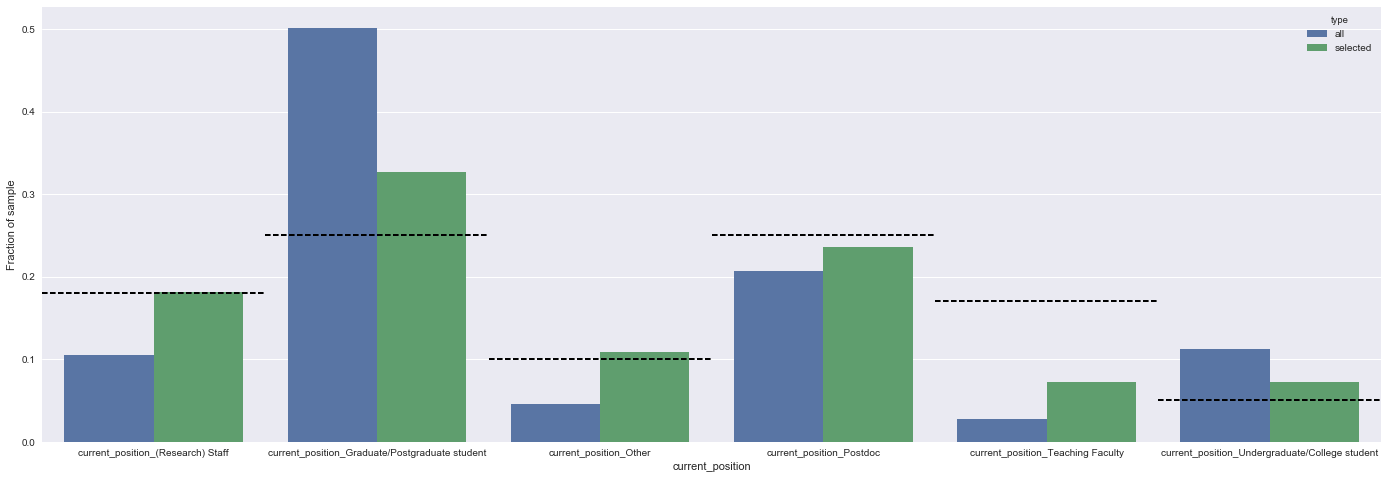

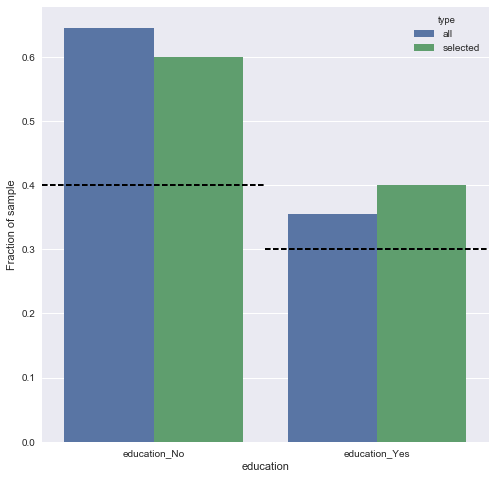

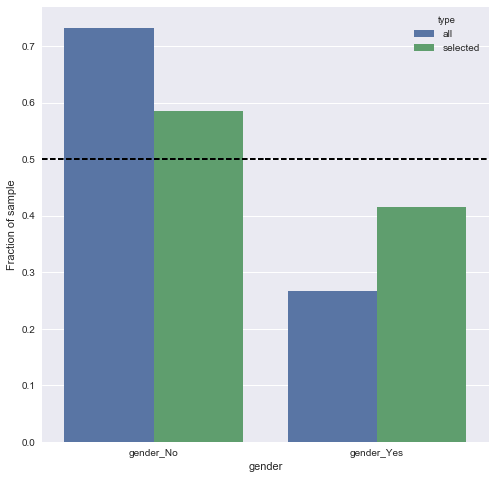

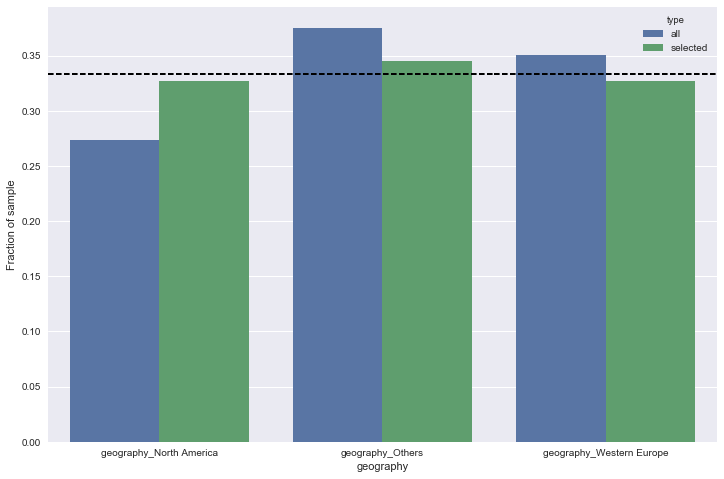

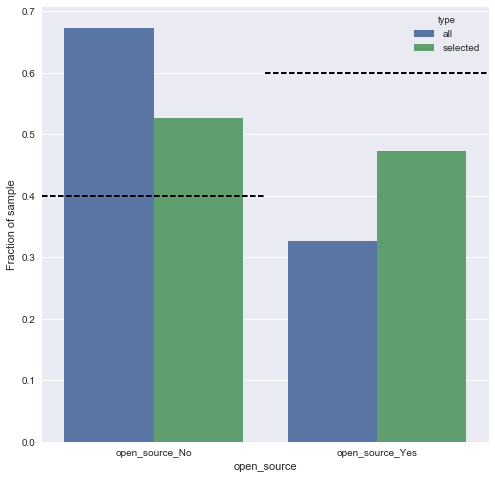

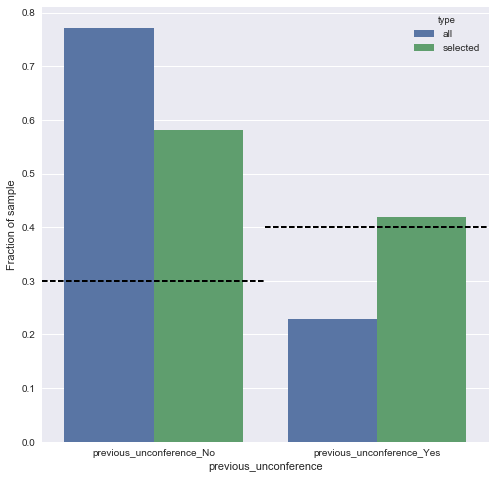

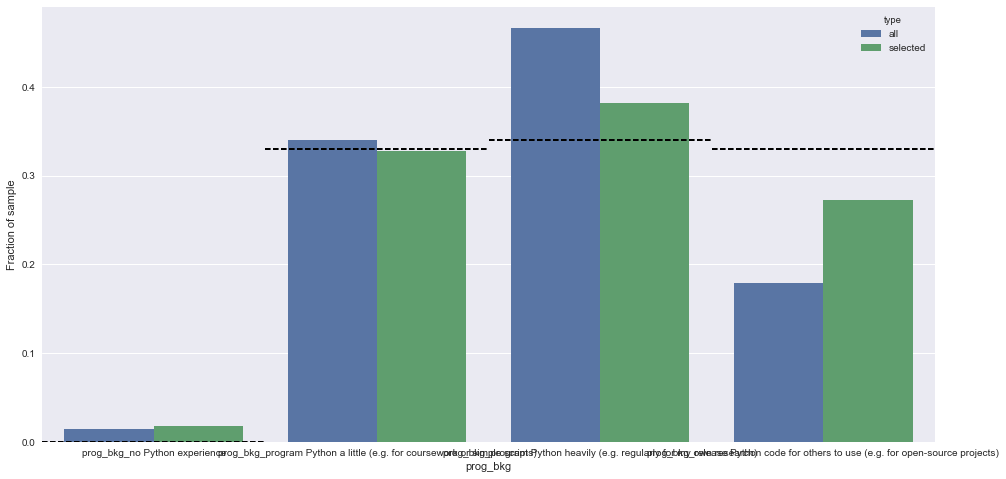

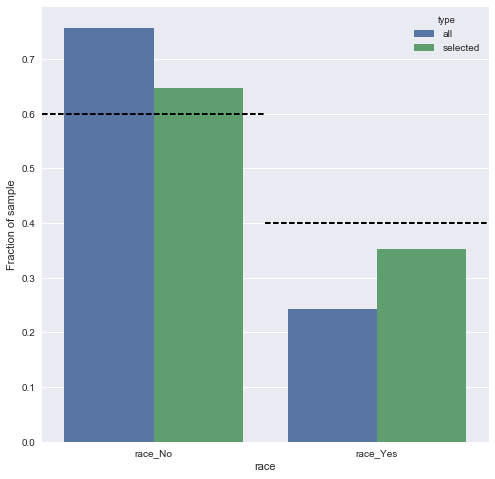

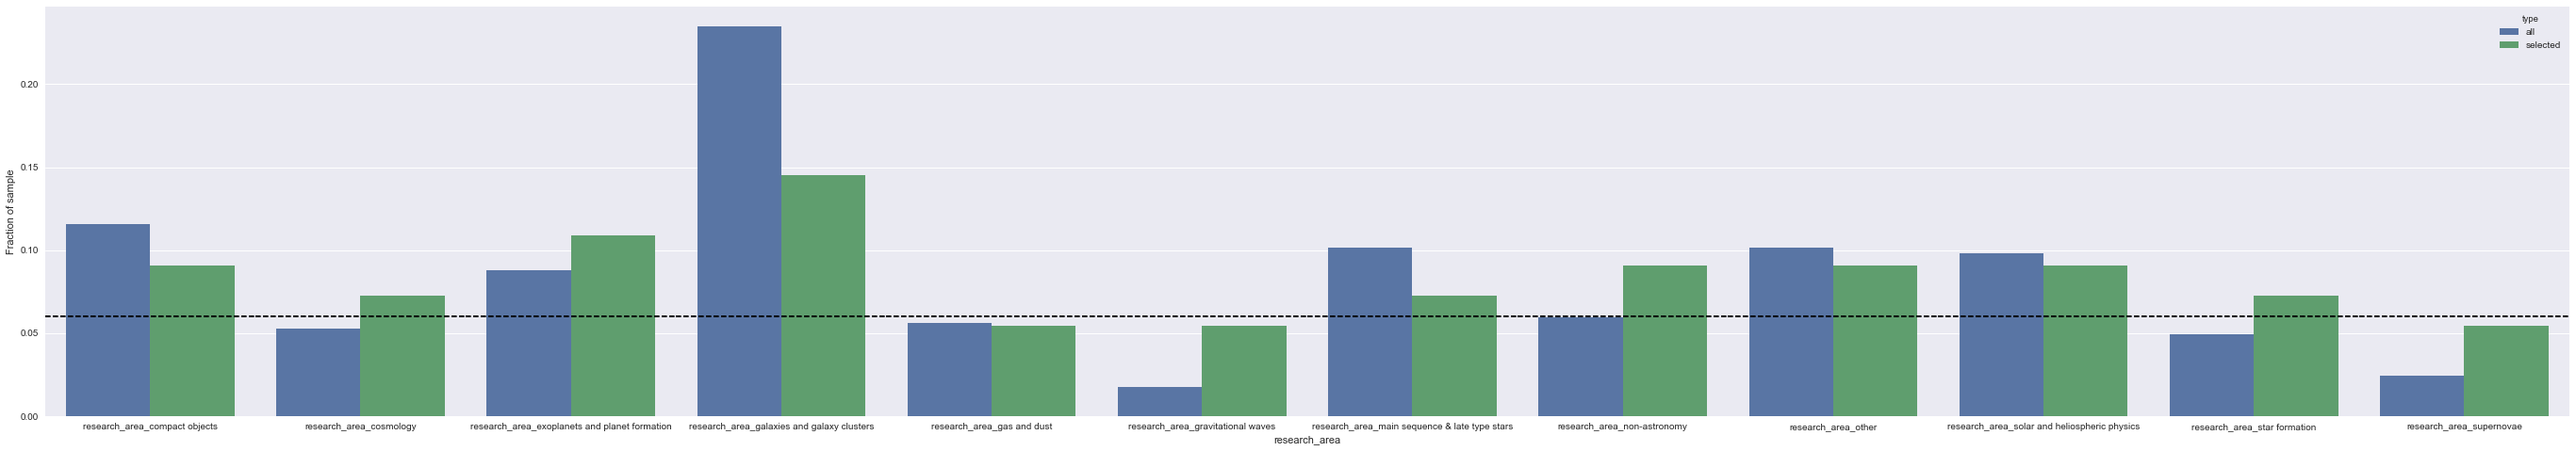

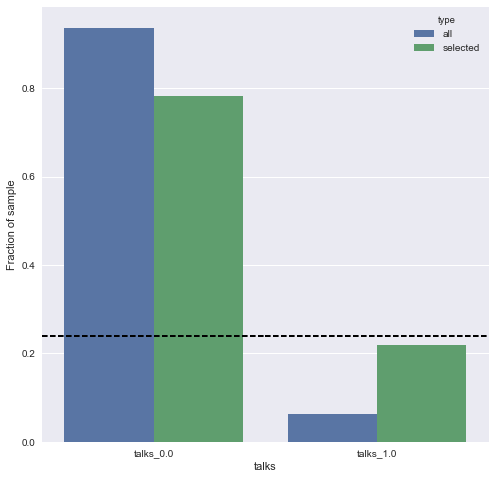

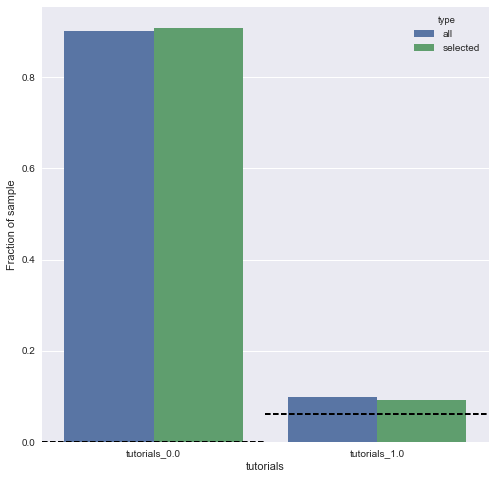

In [147]:
for c in data_ready.columns:
    _, _ = entrofy.plotting.plot_fractions(data_ready[c], idx,
                                       c, mappers[c])

These are, of course, not the exact numbers, since the data set used in this notebook only resembles the real sample in the aggregate.

What does our talk selection look like?

In [149]:
talk_idx = df_out.loc[df_out["talks"] == '1.0'].index
print("There are %i selected talks in the output set."%len(talk_idx))

There are 12 selected talks in the output set.


Now many different research areas are represented in the talks? We would like to know that so that we can be sure not all talks come from the same research area.

In [151]:
len(df_out.loc[talk_idx]["research_area"].unique())

8

What about the tutorials?

In [152]:
tutorial_idx = df_out.loc[df_out["tutorials"] == "1.0"].index
print("There are %i selected tutorials in the output set."%len(tutorial_idx))

There are 5 selected tutorials in the output set.


At this point, we finally un-blinded ourselves and printed out the names and e-mail addresses for the accepted sample set so that we could start sending out acceptance e-mails!

Aside from the organizers and a small number of pre-selected participants, the entire procedure was performed entirely without names and based only on the candidates' responses, abstracts and the complex optimization of the participant selection with respect to the goals of our workshop.  

In [153]:
accepted = data_ready.loc[idx]

In [154]:
accepted.to_csv("../data/accepted.csv", sep = "\t")

We also saved the remaining participants in a waitlist file.

In [155]:
waitlist = data_ready.loc[~data_ready.index.isin(idx)]

In [156]:
waitlist.to_csv("../data/waitlist.csv", sep="\t")

## After the selection

Not all participants accepted our invitation on the first round. To continue the selection procedure as we had done above, we removed those that declined from the set, and re-ran entrofy with those that had accepted as pre-selects. 

In the following, I will pick randomly from the set of accepted participants, since this is a simulated data set. This was of course not the case for the real sample, where the IDs corresponded to actual participants.

In the initial round, 11 candidates declined, and 2 withdrew from the waitlist. We will pick randomly from the indices of both accepted and waitlist and then remove these candidates from both:

In [159]:
declined_accepted = np.random.choice(accepted.index, replace=False, size=11)

In [160]:
declined_waitlist = np.random.choice(waitlist.index, replace=False, size=2)

Now we make a new data frame with the set of participants who accepted:

In [161]:
accepted_new = accepted.drop(declined_accepted)

We also drop these from our original data frame, since they no longer matter to our selection procedure:

In [162]:
data_ready_new = data_ready.drop(np.hstack([declined_accepted, declined_waitlist]))

In [165]:
len(data_ready_new)

272

Let's run entrofy again for new waitlist picks. We are going to up the targets for the talks, so I can be sure we have enough talks in our output sample:

In [166]:
mappers["talks"].targets["1.0"] = 0.24
mappers["talks"].targets["0.0"] = 0.24

In [167]:
len(accepted_new[accepted_new["talks"] == "1.0"].index)

9

In [169]:
idx_new, max_score_new = entrofy.core.entrofy(data_ready_new, 55, 
                                      pre_selects=accepted_new.index,
                                      mappers=mappers,
                                      weights=weights, seed=25)

In [170]:
accepted_secondrun = data_ready_new.loc[idx_new]

In [171]:
idx_fromwaitlist = accepted_secondrun.drop(accepted_new.index).index

In [172]:
idx_new

Float64Index([ 16.0,  18.0,  21.0,  25.0,  29.0,  30.0,  35.0,  41.0,  50.0,
               51.0,  54.0,  57.0,  58.0,  66.0,  71.0,  77.0,  84.0,  87.0,
               95.0,  96.0,  97.0, 102.0, 105.0, 113.0, 122.0, 129.0, 133.0,
              134.0, 144.0, 147.0, 150.0, 154.0, 168.0, 170.0, 172.0, 174.0,
              177.0, 178.0, 179.0, 183.0, 185.0, 193.0, 196.0, 209.0, 210.0,
              213.0, 228.0, 234.0, 241.0, 242.0, 246.0, 252.0, 258.0, 260.0,
              281.0],
             dtype='float64', name='ID')

At this point, we would print out the names of the newly selected participants and e-mail those as well.

In [173]:
from_waitlist_secondrun = data_ready_new.loc[idx_fromwaitlist]

Let's save the results of this run to file:

In [174]:
from_waitlist_secondrun.to_csv("../data/secondrun_fromwaitlist.csv", sep="\t")

In [175]:
df_out_new = data_ready_new.loc[idx_new]

In [176]:
talk_idx = df_out_new.loc[df_out_new["talks"] == '1.0'].index
print("There are %i selected talks in the output set."%len(talk_idx))

There are 9 selected talks in the output set.


And we can plot the results of our selection again to see whether any categories notably changed: 

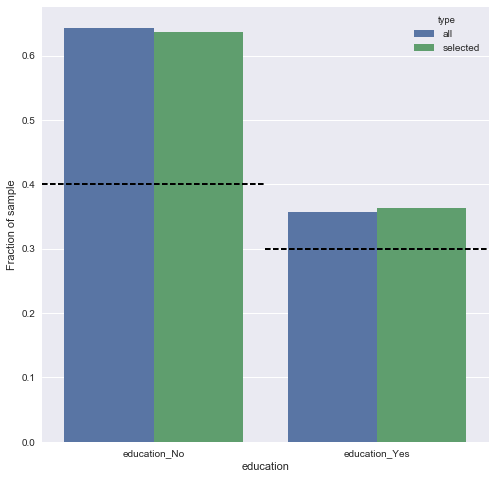

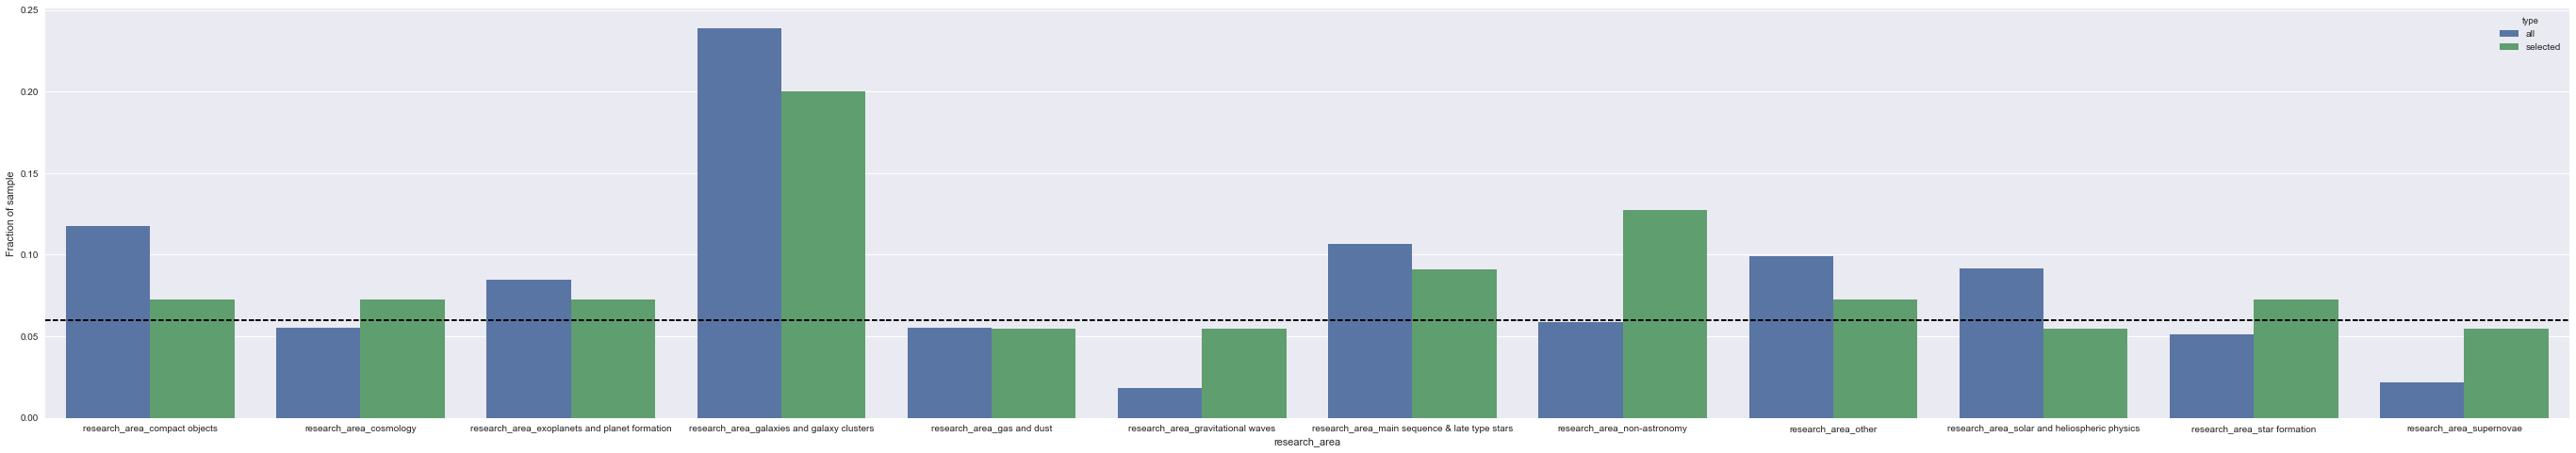

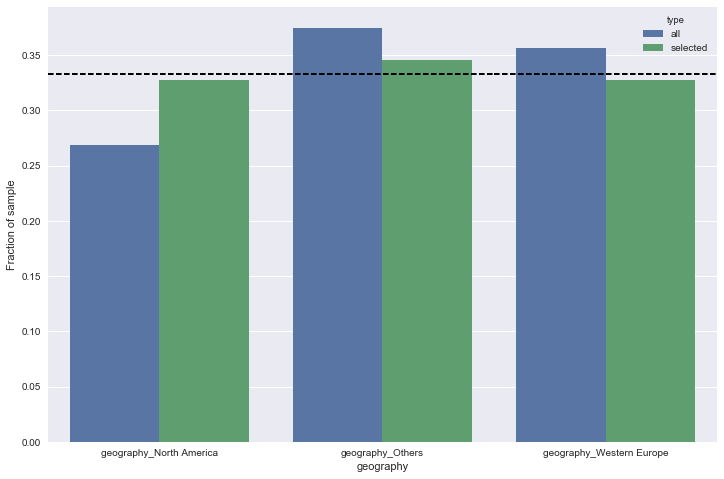

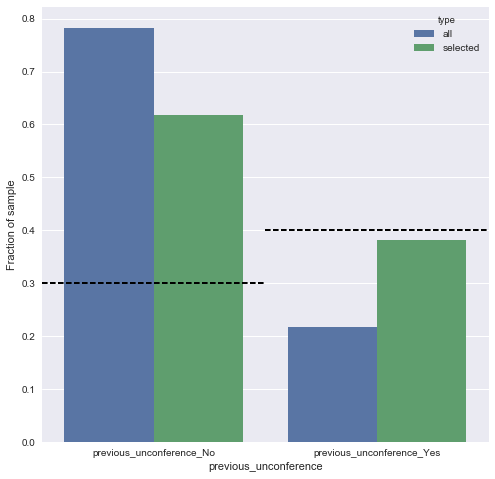

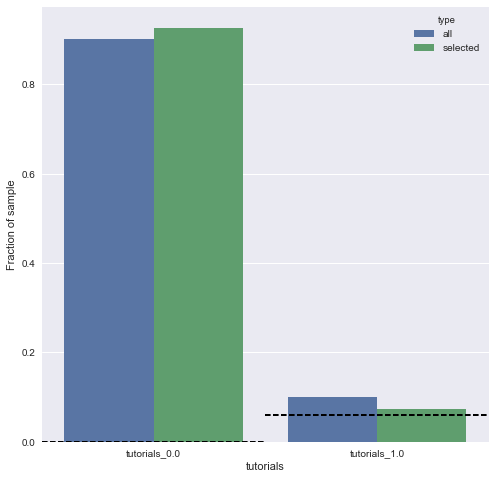

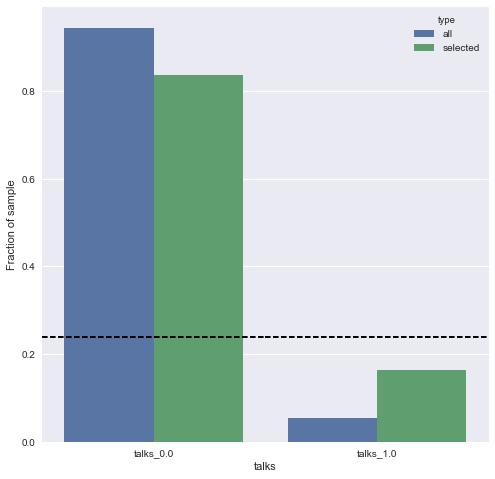

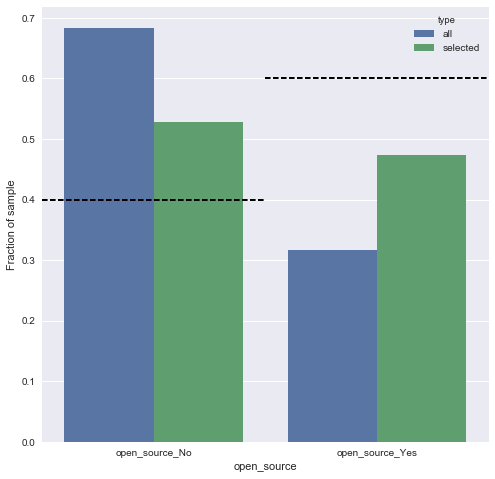

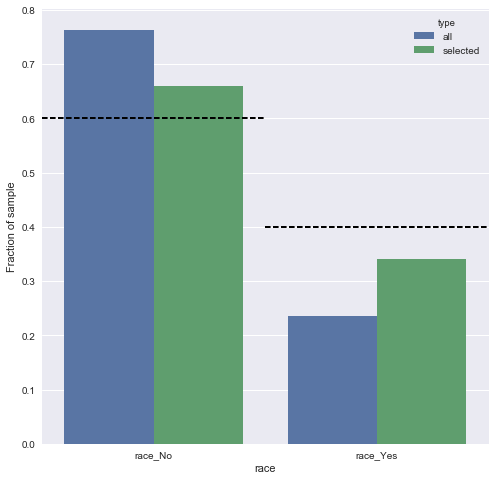

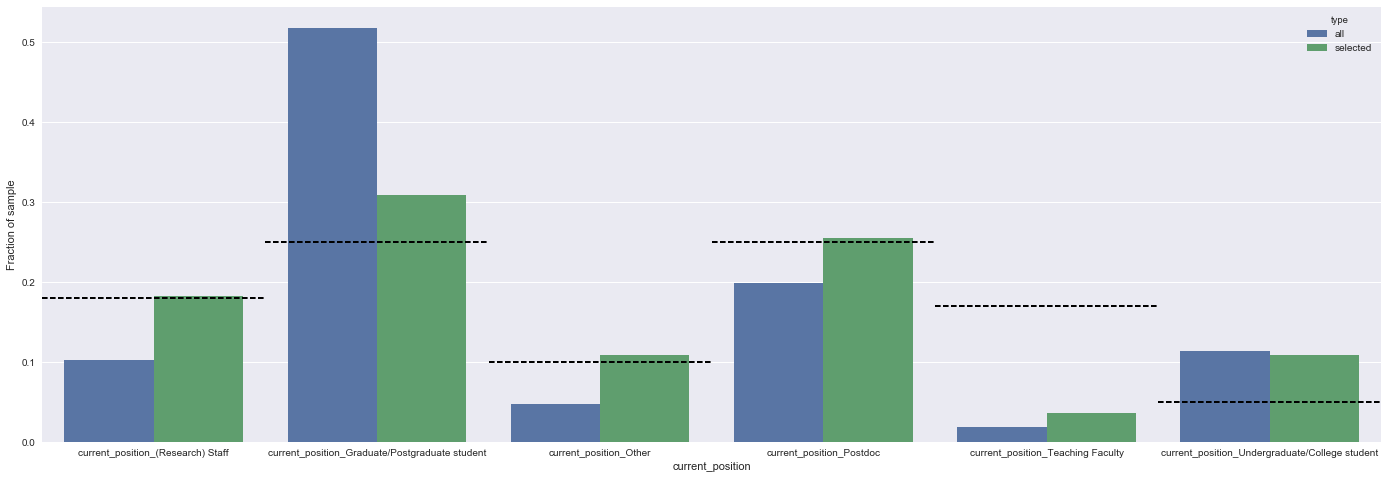

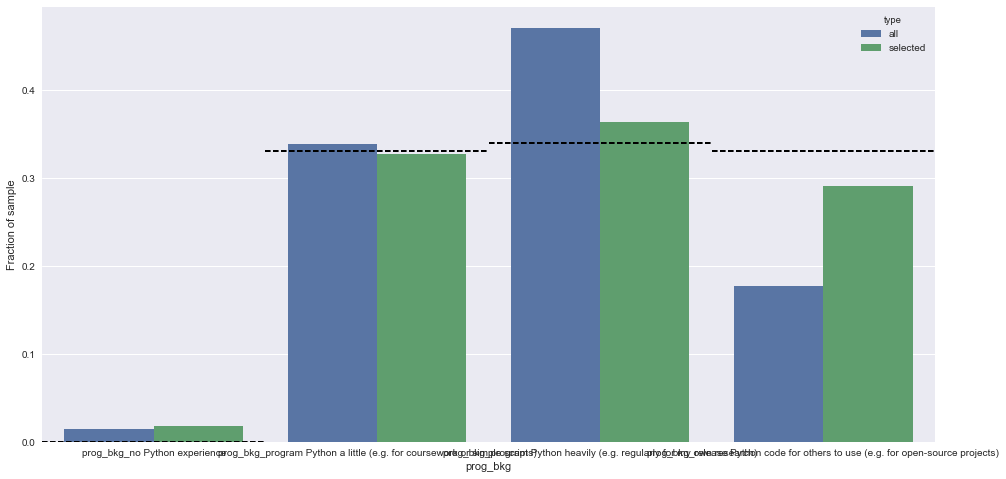

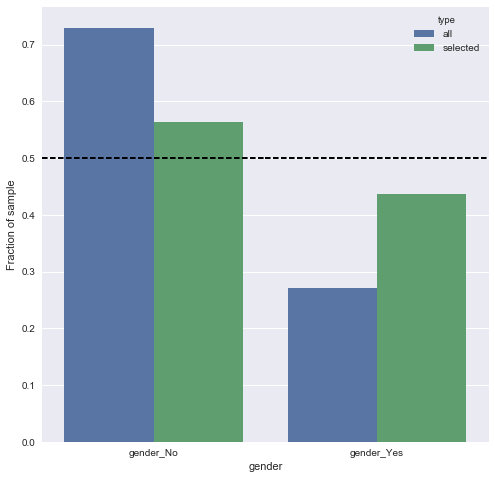

In [178]:
for c in mappers.keys():
    _, _ = entrofy.plotting.plot_fractions(data_ready_new[c], idx_new,
                                       c, mappers[c])

## Third and Fourth Round

Similarly to above, four people declined from the original list, and one from the wait list. We performed the same procedure again, and then once more for a fourth round (6 declines from accepted list, 1 from wait list). We will not repeat them here, since they do not add anything instructive to the notebook. 

## Conclusion

We hope the above will provide useful to participants of PyAstro and beyond. We know that applying to a workshop can be frustrating: decision criteria are rarely clear, and acceptance/rejection e-mails rarely contain any information about how or why a decision was made. This notebook is an attempt to be transparent to our participants as well as those who did not get accepted this year, and as mentioned above, we welcome any and all feedback about the process as we attempt to learn from our experiences and improve for next year.

As a final note, we would like to point out that we saw diversity particularly in demographic categories decline as candidates declined and we selected replacements. As of now, we are not entirely sure what the reason for this is. 
One possible explanation could be that candidates from underrepresented minorities tended to decline at a larger rate than majority candidates did. If we also exhausted the candidate pool for a given category, the model can no longer fill the targets in that category, and our overall performance declines. 
Should this be the case, more intensive targeted recruiting among underrepresented minorities in the coming year could potentially provide a more diverse applicant pool, leading to a more diverse group of participants as well. 
We also wondered whether travel funding could be an issue, in particular for junior researchers. This can be addressed by making more efforts to secure sponsorship from relevant funding bodies and companies.
